# RDKit Heatmaps
This module allows to draw heatmaps to molecular depictions, analogous to the function `rdkit.Chem.Draw.rdMolDraw2D.ContourAndDrawGaussians`.  
Contrasting the original implementation, this module offers 2-dimensional Gauss-functions, allowing to stretch the distribution. These 'stretched' distributions are used to highlight bonds. Additionally here the range of depicted values can be set manually for a consistent visualization over differing drawings. Contourlines are not supported, yet.
## Disclaimer
This package is still under development. Usage at own risk.

## Installation in Conda
If not already installed, install **pip** and **git**:  
```
conda install git
conda install pip
```
Then install via pip:
```
pip install git+git://github.com/c-feldmann/rdkit_heatmaps
```

## Quickstart
### Mapping values to a molecule
Loading required packages.

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw

In [2]:
%load_ext autoreload
%autoreload 2

Loading packages required for this example:

In [3]:
import numpy as np

Loading functions of this package.

In [4]:
from rdkit_heatmaps import mapvalues2mol
from rdkit_heatmaps.utils import transform2png

Definition and preparation of an exemplary compound.

In [5]:
test_mol = Chem.MolFromSmiles("c1ccccc1-C-c2ccccc2")
test_mol = Draw.PrepareMolForDrawing(test_mol)

Sampling values as exemplary weights for atoms and bonds:

In [6]:
random_generator = np.random.default_rng(12345)
atom_weights = random_generator.normal(loc=0.25, scale=0.25, size=len(test_mol.GetAtoms()))
bond_weights = random_generator.normal(loc=-0.25, scale=0.25, size=len(test_mol.GetBonds()))

Mapping obtained values to the molecule.

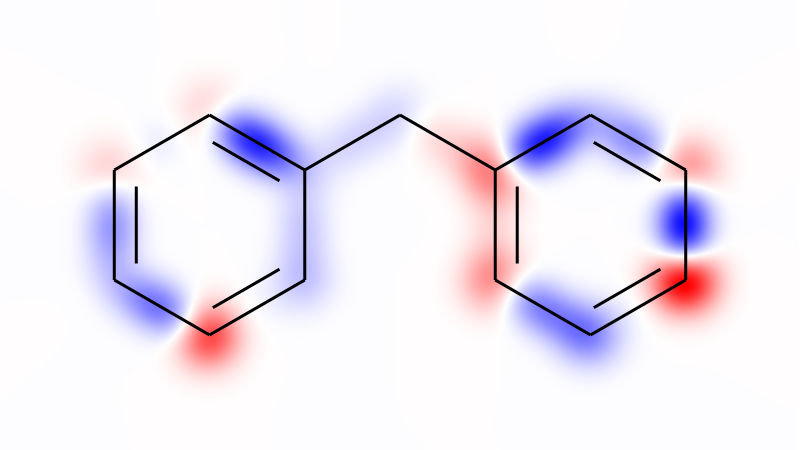

In [22]:
canvas = mapvalues2mol(test_mol, atom_weights, bond_weights)
img = transform2png(canvas.GetDrawingText())
img

## Options
### Width and length of depicted Gauss-functions

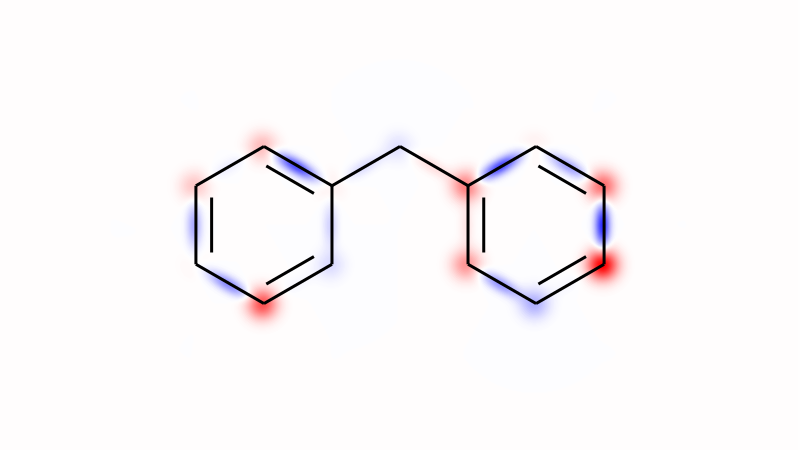

In [8]:
canvas = mapvalues2mol(test_mol, atom_weights, bond_weights, atom_width=0.2, bond_length=0.3, bond_width=0.1)
img = transform2png(canvas.GetDrawingText())
img

### Specifying colormap

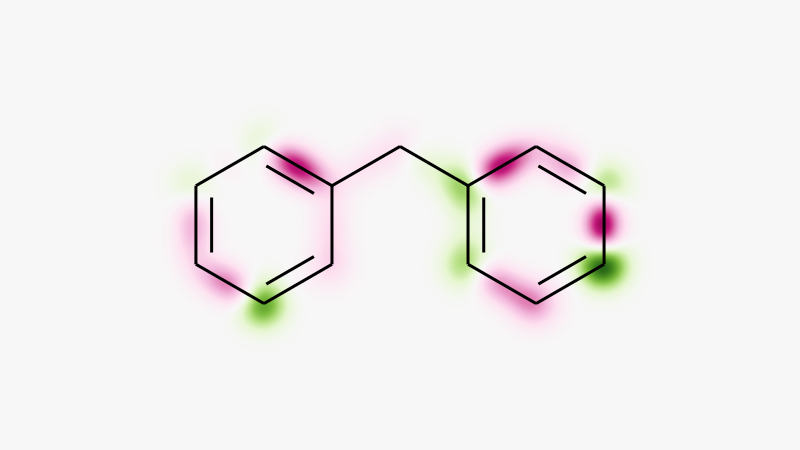

In [9]:
canvas = mapvalues2mol(test_mol, atom_weights, bond_weights, color="PiYG")
img = transform2png(canvas.GetDrawingText())
img

#### Using your own colormap

In [10]:
from matplotlib.colors import ListedColormap

# Definition of color
yellow = np.array([1, 1, 0, 1])
white  = np.array([1, 1, 1, 1])
purple = np.array([1, 0, 1, 1])

# Creating linear gradient for color mixing
linspace = np.linspace(0, 1, int(128))
linspace4d = np.vstack([linspace]*4).T

# interpolating values for 0 to 0.5 by mixing purple and white
zero_to_half = linspace4d * white + (1-linspace4d) * purple
# interpolating values for 0.5 to 1 by mixing white and yellow
half_to_one = yellow * linspace4d + white * (1-linspace4d)

# Creating new colormap from 
newcmp = ListedColormap(np.vstack([zero_to_half,half_to_one]))

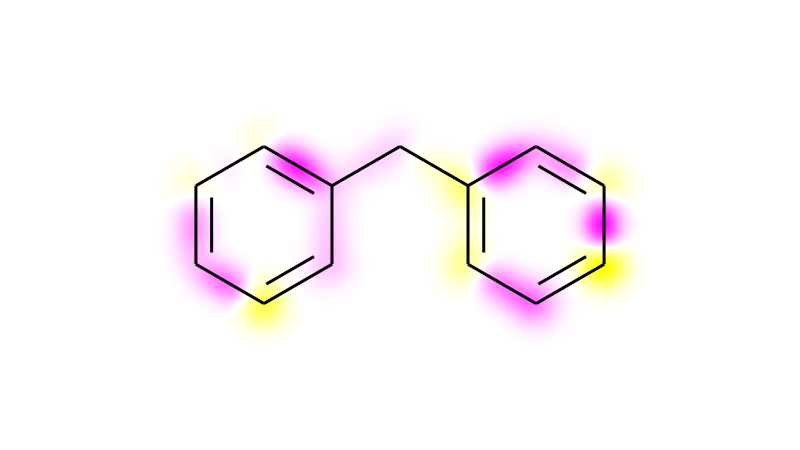

In [11]:
canvas = mapvalues2mol(test_mol, atom_weights, bond_weights, color=newcmp)
img = transform2png(canvas.GetDrawingText())
img

### Specifying boundaries of depicted values

In [12]:
max_value = np.max([np.max(atom_weights), np.max(bond_weights)])
min_value = np.min([np.min(atom_weights), np.min(bond_weights)])

In [13]:
print("Values range from {:0.2f} to {:0.2f}".format(min_value, max_value))

Values range from -0.66 to 0.84


In [14]:
artificial_limit = [-2, 2]

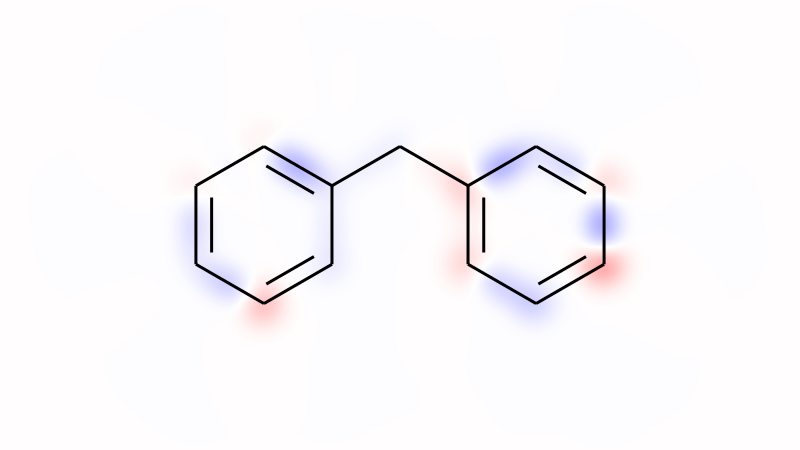

In [15]:
canvas = mapvalues2mol(test_mol, atom_weights, bond_weights, value_lims=artificial_limit)
img = transform2png(canvas.GetDrawingText())
img

### Miscellaneous options
* `canvas` (`rdMolDraw2D.MolDraw2D`): Rdkit Canvas to draw on. If none is given, a new one is created 
* `grid_resolution` (`[int, int]`): number of drawn pixels (x and y axis)
* `padding` (`[float, float]`): increase of height and width of heatmap relative to space of drawn molecule (usually increased by 100%)

## Function

## Other features of this package
### Mapping custom functions

In [16]:
from rdkit.Chem import AllChem
from rdkit.Chem.Draw.rdMolDraw2D import MolDraw2DCairo
from rdkit.Chem.Draw.rdMolDraw2D import MolDrawOptions
from rdkit.Geometry.rdGeometry import Point2D
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from IPython.display import SVG

In [17]:
from rdkit.Chem.Draw.rdMolDraw2D import MolDraw2DSVG

### Drawing images

In [18]:
import rdkit

In [19]:
rdkit.__version__

'2021.09.5'

In [20]:
from rdkit_heatmaps import heatmaps
from rdkit_heatmaps.utils import get_mol_lims
from rdkit_heatmaps.utils import pad

from rdkit_heatmaps.functions import GaussFunction2D

In [21]:
image = np.array(Image.open('039.jpg'))
image = image / 255
image = np.flip(image, axis=0)
ones = np.ones([*image.shape[:2], 1])
image = np.append(image, ones, axis=2)
image = np.swapaxes(image,1,0)
s = 5
c_grid = heatmaps.ColorGrid([s,-s], [s/8*4.5,-s/8*4.5], image.shape[0], image.shape[1])
c_grid.color_grid = image

NameError: name 'Image' is not defined

In [ ]:
d = MolDraw2DCairo(800, 450)
do = d.drawOptions()
do.padding = 0.2
do.bondLineWidth = 3
d.SetDrawOptions(do)
d.DrawMolecule(test_mol)
heatmaps.color_canvas(d, c_grid)
d.DrawMolecule(test_mol)
transform2png(d.GetDrawingText())